In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re

In [2]:
train_data = pd.read_csv("train_data.csv",names=["sentiments", "reviews"])

In [3]:
def basic_cleaning(data_frame):
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.lower())
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.punctuation)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.digits)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: re.sub("r[^a-z]",'',review))

    
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_data(data_frame):
    data_frame['words'] = data_frame.reviews.apply(lambda review: nltk.word_tokenize(review))

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(list):
    stop_words_removed = []
    for i in list:
        if i not in stopwords:
            stop_words_removed.append(i)
    return stop_words_removed

In [6]:
# nltk.download('all')
#tag part of speech to get more accurate word during lemmatizaton
def tag_pos(list_of_words):
    return nltk.pos_tag(list_of_words)

#extraction of lemma words after pos taggin 
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

def find_lemma_word(word):
    lemma_words=[]
    words_with_pos = tag_pos(word)
    for word in words_with_pos:
        if word[1].startswith('NN'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='n'))
        elif word[1].startswith('VB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='v'))
        elif word[1].startswith('JJ'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='a'))
        elif word[1].startswith('RB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='r'))
        else:
            lemma_words.append(word[0])
            
    return lemma_words

In [5]:
basic_cleaning(train_data)
tokenize_data(train_data)
train_data['stop_words_cleaned'] = train_data.words.apply(lambda word_list: remove_stopwords(word_list))
train_data['lemma_word'] = train_data.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
train_data['cleaned_review'] = train_data.lemma_word.apply(lambda review_list: " ".join(review_list))

In [7]:
train_data

,sentiments,reviews,words,stop_words_cleaned,lemma_word,cleaned_review
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv...",eat fioris say youll like saidnnis convenientl...
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ...",dont understand appeal ive tried place twice t...
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada...",go place foa really good beef enchilada red sa...
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ...",impressed order oyako bowl conversation go som...
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr...",first time evei write bad review frustrate her...
...,...,...,...,...,...,...
17995,-1,i was referred to go to this place by a buddy ...,"[i, was, referred, to, go, to, this, place, by...","[referred, go, place, buddy, aftea, conversati...","[refer, go, place, buddy, aftea, conversation,...",refer go place buddy aftea conversation get sh...
17996,1,the food here was really good we started off ...,"[the, food, here, was, really, good, we, start...","[food, really, good, started, garlic, bread, c...","[food, really, good, start, garlic, bread, cov...",food really good start garlic bread cover toma...
17997,1,i eat at this place maybe a week i am die har...,"[i, eat, at, this, place, maybe, a, week, i, a...","[eat, place, maybe, week, die, hard, wing, fan...","[eat, place, maybe, week, die, hard, wing, fan...",eat place maybe week die hard wing fan best ev...
17998,1,phoenix airport is getting betteday by day i ...,"[phoenix, airport, is, getting, betteday, by, ...","[phoenix, airport, getting, betteday, day, pri...","[phoenix, airport, get, betteday, day, primari...",phoenix airport get betteday day primarily use...


In [8]:
from sklearn.model_selection import train_test_split
train_review, test_review, train_sentiment, test_sentiment =train_test_split(train_data.cleaned_review,train_data.sentiments,shuffle=True,random_state=0,stratify=train_data.sentiments,train_size=.95)

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(min_df=.02,use_idf=False)
feature_matrix = tf_vectorizer.fit_transform(train_review)
feature_array = feature_matrix.toarray()

In [201]:
vocab_list = tf_vectorizer.get_feature_names_out()
vocab_list.shape

(466,)

### Select K-best features

In [226]:
from sklearn.feature_selection import SelectKBest, chi2

vocab_list = tf_vectorizer.get_feature_names_out()

select_k_best = SelectKBest(score_func=chi2, k= int(len(vocab_list)*.10))
train_sentiment_np_array = np.array(train_sentiment)
select_k_best.fit(feature_array, train_sentiment_np_array)
mask = select_k_best.get_support()
k_best_feature = vocab_list[mask]
k_best_feature

array(['always', 'amaze', 'amazing', 'ask', 'awesome', 'bad', 'best',
       'bland', 'call', 'definitely', 'delicious', 'didnt', 'dirty',
       'dry', 'excellent', 'fantastic', 'favorite', 'fresh', 'friendly',
       'fun', 'give', 'good', 'great', 'helpful', 'horrible', 'leave',
       'love', 'minute', 'nothing', 'ok', 'order', 'pay', 'perfect',
       'phoenix', 'recommend', 'rude', 'say', 'taste', 'tell', 'terrible',
       'us', 'valley', 'waitress', 'wasnt', 'wonderful', 'would'],
      dtype=object)

In [227]:
k_best_feature.shape

(46,)

### Supervised Chi-Square weight for k-best term by utilising target value

In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer
selected_tf_vectorizer = TfidfVectorizer(use_idf=True, vocabulary=k_best_feature)
selected_feat_array = selected_tf_vectorizer.fit_transform(train_review).toarray()
selected_test_array = selected_tf_vectorizer.transform(test_review).toarray()
observed_value_table = pd.DataFrame(selected_tf_vectorizer.get_feature_names_out(), columns=['features'])

In [229]:
selected_tf_vectorizer.get_feature_names_out().shape

(46,)

In [230]:
tf_data_frame = pd.DataFrame(selected_feat_array,columns = selected_tf_vectorizer.get_feature_names_out())
tf_data_frame['sentiments'] = np.array(train_sentiment)

In [231]:
observed_value_table['positive_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==1,feature].sum())

In [232]:
observed_value_table['negative_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==-1,feature].sum())

In [233]:
observed_value_table['total_row_count'] = observed_value_table['positive_sentiment'] + observed_value_table['negative_sentiment']

In [234]:
tf_data_frame

,always,amaze,amazing,ask,awesome,bad,best,bland,call,definitely,...,taste,tell,terrible,us,valley,waitress,wasnt,wonderful,would,sentiments
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
3,0.000000,0.000000,0.0,0.0,0.000000,0.298961,0.000000,0.0,0.000000,0.0,...,0.0,0.620664,0.0,0.000000,0.0,0.0,0.000000,0.0,0.244304,-1
4,0.423869,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
17096,0.000000,0.000000,0.0,0.0,0.393973,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.310647,0.0,0.0,0.000000,0.0,0.000000,1
17097,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.599381,0.0,0.226755,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1
17098,0.000000,0.000000,0.0,0.0,0.511951,0.390460,0.388216,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.457288,0.0,0.000000,-1


In [235]:
observed_value_table

,features,positive_sentiment,negative_sentiment,total_row_count
0,always,791.793152,312.218270,1104.011422
1,amaze,326.487236,47.852626,374.339862
2,amazing,164.628708,31.960351,196.589060
3,ask,231.173221,582.068597,813.241819
4,awesome,388.992648,75.692347,464.684995
5,bad,167.671410,804.485587,972.156997
6,best,736.774209,297.226747,1034.000956
7,bland,20.592828,240.229124,260.821952
8,call,208.537484,477.008672,685.546156
9,definitely,403.515450,185.200311,588.715761


In [236]:
chi_sqare_expected = pd.DataFrame()

#### Calculating expected value table for chi-sqare function

In [237]:
def chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum):
    positive_chi_value = []
    negative_chi_value = []
    for i in range(0, len(row_totals)):
        positive_chi_value.append((row_totals[i]*positive_column_total)/total_sum)
        negative_chi_value.append((row_totals[i]*negative_column_total)/total_sum)
    return positive_chi_value, negative_chi_value

In [238]:
row_totals = np.array(observed_value_table['total_row_count'])
positive_column_total = observed_value_table['positive_sentiment'].sum()
negative_column_total = observed_value_table['negative_sentiment'].sum()
total_sum = observed_value_table['total_row_count'].sum()
expected_positive, expected_negative = chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum)

In [239]:
chi_sqare_expected['+1'] = np.array(expected_positive)
chi_sqare_expected['-1'] = np.array(expected_negative)

In [240]:
chi_sqare_expected

,+1,-1
0,549.975465,554.035957
1,186.481530,187.858331
2,97.933008,98.656052
3,405.125381,408.116438
4,231.487955,233.197040
5,484.290729,487.866268
6,515.098980,518.901977
7,129.931332,130.890620
8,341.512378,344.033778
9,293.275249,295.440512


In [241]:
chi_sqare_table = pd.DataFrame()

In [242]:
chi_sqare_table['positiev_sentiments'] = ((observed_value_table['positive_sentiment'] - chi_sqare_expected['+1'])**2)/chi_sqare_expected['+1']
chi_sqare_table['negatiev_sentiments'] = ((observed_value_table['negative_sentiment'] - chi_sqare_expected['-1'])**2)/chi_sqare_expected['-1']
chi_sqare_table['sum'] = chi_sqare_table['positiev_sentiments'] + chi_sqare_table['negatiev_sentiments']

In [243]:
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,106.324368,105.545124,211.869492
1,105.112809,104.342444,209.455253
2,45.422034,45.089139,90.511173
3,74.691331,74.143923,148.835254
4,107.166389,106.380974,213.547363
5,206.999200,205.482117,412.481317
6,95.398961,94.699788,190.098749
7,92.009435,91.335104,183.344538
8,51.776520,51.397053,103.173573
9,41.438553,41.134853,82.573405


### Create weighted features

In [244]:
def generate_chi_sqare_weighted_features(train_feat_array, train_sentiments, chi_weight):
    new_weighted_feature= []
    sentiments = np.array(train_sentiments)
    for i in range(0,len(sentiments)):                
            new_weighted_feature.append(np.multiply(train_feat_array[i], chi_weight))
    return new_weighted_feature        

In [245]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [246]:
chi_weight = np.array (chi_sqare_table['sum'])
weighted_selected_feat = np.array(
    generate_chi_sqare_weighted_features(selected_feat_array, train_sentiment,chi_weight))

In [247]:
test_sentiments_array = np.array(test_sentiment)
train_sentiments_array = np.array(train_sentiment)
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
weighted_test_feat = weight_unlabled_data( selected_test_array, chi_weight)
max_neighbour =np.sqrt(int(len(weighted_selected_feat)))
max_neighbour = np.ceil(max_neighbour)

In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
track_precision=[]
error = []
for i in range(3,80):
    print(i)
    classifer = KNeighborsClassifier(n_neighbors=i,n_jobs=3,weights='distance')
    classifer.fit(weighted_selected_feat, train_sentiments_array)
    sentiments_predict = classifer.predict(weighted_test_feat)
    score = metrics.accuracy_score(test_sentiments_array,sentiments_predict)
    print(score)
    track_precision.append(score)
    error.append(1-score)

3
0.7611111111111111
4
0.7577777777777778
5
0.7666666666666667
6
0.7655555555555555
7
0.7822222222222223
8
0.7755555555555556
9
0.7788888888888889
10
0.7822222222222223
11
0.7833333333333333
12
0.7833333333333333
13
0.7922222222222223
14
0.7922222222222223
15
0.7922222222222223
16
0.7911111111111111
17
0.7944444444444444
18
0.7911111111111111
19
0.7911111111111111
20
0.7911111111111111
21
0.79
22
0.79
23
0.7933333333333333
24
0.7922222222222223
25
0.7944444444444444
26
0.7955555555555556
27
0.7966666666666666
28
0.7966666666666666
29
0.7955555555555556
30
0.7955555555555556
31
0.7966666666666666
32
0.7877777777777778
33
0.7922222222222223
34
0.7911111111111111
35
0.79
36
0.7911111111111111
37
0.79
38
0.7922222222222223
39
0.7911111111111111
40
0.7877777777777778
41
0.7955555555555556
42
0.7966666666666666
43
0.7955555555555556
44
0.7955555555555556
45
0.7944444444444444
46
0.7955555555555556
47
0.7955555555555556
48
0.7955555555555556
49
0.7944444444444444
50
0.7944444444444444
51
0.79

In [150]:
# from sklearn.metrics.pairwise import euclidean_distances
# def calculate_uclidien_distance(train_data, test_data):
#     print("calculate_uclidien_distance in")
#     uc_distance = euclidean_distances([train_data],[test_data])
#     print("calculate_uclidien_distance out")
#     return 1/((np.sqrt(uc_distance))**2)        

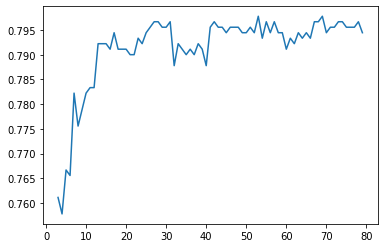

In [249]:
plt.plot(range(3,80),track_precision)

In [35]:
# df = pd.DataFrame(weighted_selected_feat)

In [36]:
def calculate_neighbour(train_data, test_data, K):
    
    numpy_distances = np.array(euclidean_distances(train_data,[test_data]).flatten())
    inv_distance = []
        
    indexes_by_shortest_dist = numpy_distances.argsort()   
    
    return indexes_by_shortest_dist

In [37]:
def find_majority_and_predict(train_data, test_data, train_sentiments, K):
    
    nearest_neighbors_indexes = calculate_neighbour(train_data, test_data, K)
    sentiment_classes = []
    
    for i in nearest_neighbors_indexes:
        sentiment_classes.append(train_sentiments[i])
        
    return max(sentiment_classes, key=sentiment_classes.count)

In [38]:
predicted_sentiments = []
print(len(weighted_test_feat))
for i in range(0,len(weighted_test_feat)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,weighted_test_feat[i], train_sentiments_array, 24))
    

900
0
1
2
3
4
5
6
7
8
9
10
11
12
13


KeyboardInterrupt: 

In [ ]:
def find_accuracy(predicted_sentiment, real_sentiment):
    correct_prediction = 0
    for i in range(0,len(predicted_sentiments)):
        if predicted_sentiment[i] == real_sentiment[i]:
            correct_prediction += 1
    return np.divide(correct_prediction, len(predicted_sentiment))

In [ ]:
find_accuracy(predicted_sentiments,test_sentiments_array)

In [ ]:
result_test_df = pd.read_csv('1661892619_9579706_test_file.csv', names=['reviews'])
basic_cleaning(result_test_df)
tokenize_data(result_test_df)
result_test_df['stop_words_cleaned'] = result_test_df.words.apply(lambda word_list: remove_stopwords(word_list))
result_test_df['lemma_word'] = result_test_df.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
result_test_df['cleaned_review'] = result_test_df.lemma_word.apply(lambda review_list: " ".join(review_list))
unlabeled_test_feat_matrix = selected_tf_vectorizer.transform(result_test_df['cleaned_review']).toarray()

In [ ]:
unlabeled_test_feat_matrix.shape

In [ ]:
# def find_max_chi_val(a,b):
#     max_chi = []
#     x = np.array(a)
#     y = np.array(b)
#     for i in range(0, len(x)):
#         max_chi.append(max(x[i],y[i]))
#     return np.array(max_chi)

In [ ]:
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
chi_sqare_table

In [ ]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [ ]:
unlabled_weighted_data = weight_unlabled_data(unlabeled_test_feat_matrix, chi_sqare_table['sum'])

In [ ]:
unlabled_weighted_data.shape

In [ ]:
predicted_sentiments = []
print(len(unlabled_weighted_data))
for i in range(0,len(unlabled_weighted_data)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,unlabled_weighted_data[i], train_sentiments_array, 24))
    

In [ ]:
# predicted_values = classifer.predict(unlabled_weighted_data)

In [ ]:
import csv
outfile = open('./results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], predicted_sentiments))
outfile.close()

In [ ]:
1/(10**2)